In [2]:
#import all modules for the classification
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [3]:
# Load in data
data = pd.read_csv('total_data_set.csv', sep=' ')
df = pd.DataFrame(data)

# Extract the labels
#labels = np.array(df.pop('label'))

In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df[['size', 'width', 'length', 'distance']]  # Features
y=df['label']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [5]:
print(len(X_train))
print(len(X_test))

16877
7234


In [6]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
clf.fit(X_train,y_train)

#check the model in test set
y_pred=clf.predict(X_test)

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",clf.score(X_test,y_test))

Accuracy: 0.9579762233895494


In [8]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9579762233895494


In [9]:
#prediction labels
print(y_pred)

[0. 1. 1. ... 0. 1. 0.]


In [10]:
#prediction probabitities 
#rf_probs = clf.predict_proba(X_test)[:, 1]
#rf_probs

In [11]:
#prediction probabitities 
proba = clf.predict_proba(X_test)
print(proba)
#print(len(pred_proba))
#proba[:,0]-------proton
#proba[:,1]--------gamma

[[1.   0.  ]
 [0.01 0.99]
 [0.26 0.74]
 ...
 [0.99 0.01]
 [0.   1.  ]
 [1.   0.  ]]


In [12]:
#calculating confusion matrics
#TP,FP,FN,TN
samples = [[], [], [], []]

treshold = np.arange(0, 1, 0.01)
for t in treshold:
    selection = proba[:,1] > t
    selection0 = y_test[selection] == 1  
    samples[0].append(selection0.sum()) # True positive(TP), gamma
    
    samples[1].append((y_test[~selection] == 1).sum()) #False positive(FP)
    samples[2].append((y_test[~selection] == 0).sum()) #True negitive(TN), proton
    selection3 = y_test[selection] == 0 
    
    samples[3].append(selection3.sum()) #False negitive(FN)
    
samples = np.array(samples)
total=np.sum(samples[0]+samples[1]+samples[2]+samples[3])
total

723400

In [13]:
#Calculating total number of photons and protons in the test set
n_photo_test = (y_test == 1).sum()
n_proto_test = (y_test == 0).sum()
print(n_photo_test)
print(n_proto_test)

4024
3210


In [14]:
print(samples[0])
n_photo_test
print(samples[3])

[4006 4000 3994 3991 3986 3984 3984 3984 3981 3977 3976 3972 3971 3969
 3968 3964 3963 3961 3959 3958 3956 3955 3955 3954 3953 3953 3951 3949
 3947 3945 3943 3941 3939 3935 3931 3927 3926 3926 3924 3923 3922 3919
 3912 3910 3907 3904 3901 3898 3896 3891 3886 3881 3878 3876 3869 3865
 3856 3850 3845 3839 3835 3829 3820 3816 3813 3806 3793 3786 3774 3764
 3747 3739 3732 3723 3714 3704 3694 3684 3670 3659 3642 3619 3603 3583
 3561 3536 3522 3495 3464 3423 3386 3354 3313 3267 3227 3138 3045 2914
 2702 2237]
[1814 1337 1060  890  777  667  595  542  496  454  433  404  387  370
  349  338  325  320  310  301  292  282  272  263  259  247  241  238
  231  227  225  220  219  213  210  206  205  201  200  198  195  190
  189  184  179  175  175  170  169  168  166  162  158  156  150  146
  144  143  140  137  134  128  122  118  115  114  112  109  107  105
  100   98   96   94   90   88   86   83   78   75   74   72   69   65
   62   61   60   59   53   50   48   43   38   36   31   28   23

In [15]:
##calculate Q-factor and efficiencies

#photon efficiencies:TP/Total_test_gamma
ph_eff = (samples[0])/n_photo_test 
print(ph_eff)
#proton efficiency:FP/Total_test_proton
pro_eff = (samples[3]/n_proto_test)
print(pro_eff)
#Q-factor
Q = ph_eff/np.sqrt(pro_eff)
print(Q)

[0.99552684 0.99403579 0.99254473 0.9917992  0.99055666 0.99005964
 0.99005964 0.99005964 0.98931412 0.98832008 0.98807157 0.98707753
 0.98682903 0.98633201 0.9860835  0.98508946 0.98484095 0.98434394
 0.98384692 0.98359841 0.98310139 0.98285288 0.98285288 0.98260437
 0.98235586 0.98235586 0.98185885 0.98136183 0.98086481 0.98036779
 0.97987078 0.97937376 0.97887674 0.9778827  0.97688867 0.97589463
 0.97564612 0.97564612 0.97514911 0.9749006  0.97465209 0.97390656
 0.972167   0.97166998 0.97092445 0.97017893 0.9694334  0.96868787
 0.96819085 0.96694831 0.96570577 0.96446322 0.96371769 0.96322068
 0.96148111 0.96048708 0.9582505  0.95675944 0.9555169  0.95402584
 0.95303181 0.95154076 0.94930417 0.94831014 0.94756461 0.94582505
 0.94259443 0.94085487 0.93787276 0.93538767 0.93116302 0.92917495
 0.92743539 0.92519881 0.92296223 0.92047714 0.91799205 0.91550696
 0.91202783 0.90929423 0.90506958 0.89935388 0.89537773 0.89040755
 0.88494036 0.87872763 0.87524851 0.86853877 0.86083499 0.8506

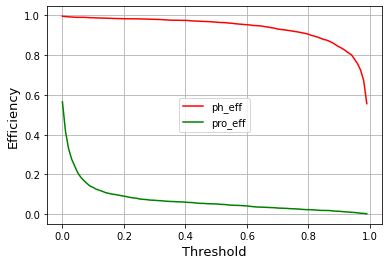

In [16]:
##photon efficiencies vs cut:
plt.plot(treshold, ph_eff, color='red', label="ph_eff")
##proton efficiency vs cut
plt.plot(treshold, pro_eff, color='green', label='pro_eff')
plt.legend(loc='best')
plt.xlabel("Threshold", fontsize=13)
plt.ylabel("Efficiency", fontsize=13)
plt.grid()

In [17]:
samples[3]

array([1814, 1337, 1060,  890,  777,  667,  595,  542,  496,  454,  433,
        404,  387,  370,  349,  338,  325,  320,  310,  301,  292,  282,
        272,  263,  259,  247,  241,  238,  231,  227,  225,  220,  219,
        213,  210,  206,  205,  201,  200,  198,  195,  190,  189,  184,
        179,  175,  175,  170,  169,  168,  166,  162,  158,  156,  150,
        146,  144,  143,  140,  137,  134,  128,  122,  118,  115,  114,
        112,  109,  107,  105,  100,   98,   96,   94,   90,   88,   86,
         83,   78,   75,   74,   72,   69,   65,   62,   61,   60,   59,
         53,   50,   48,   43,   38,   36,   31,   28,   23,   16,   14,
          5])

In [18]:
##proton suppression cut values
#samples[3][treshold==0.9]/n_proto_test
samples[3][np.isclose(treshold, 0.9, atol=0.001)]/n_proto_test

array([0.01495327])

In [19]:
samples[0][np.isclose(treshold, 0.9, atol=0.001)]/n_photo_test

array([0.84145129])

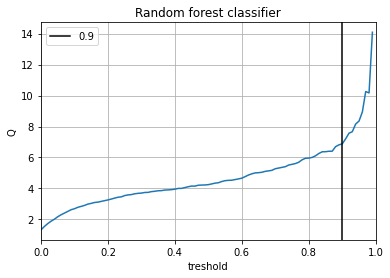

In [20]:
plt.plot(treshold, (samples[0]/n_photo_test)/np.sqrt((samples[3]/n_proto_test)))
plt.grid()
plt.xlim(0,1)
plt.xlabel('treshold')
plt.ylabel('Q')
tval = 0.9
plt.title('Random forest classifier')
plt.axvline(tval, color='k', label=f'{tval}')
plt.legend()

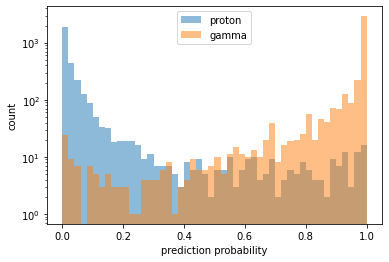

In [21]:
##Plot the distribution of probabilities
#plt.hist(pred_proba[y_test==0,1], bins=50, alpha=0.5, label='proton')
#plt.hist(pred_proba[y_test==1,1], bins=50, alpha=0.5, label ='gamma')
plt.hist(proba[y_test==0,1], bins=50, alpha=0.5, label='proton')
plt.hist(proba[y_test==1,1], bins=50, alpha=0.5, label ='gamma')
plt.yscale('log')
plt.ylabel('count')
plt.xlabel('prediction probability')
plt.legend(loc='best')
plt.show()

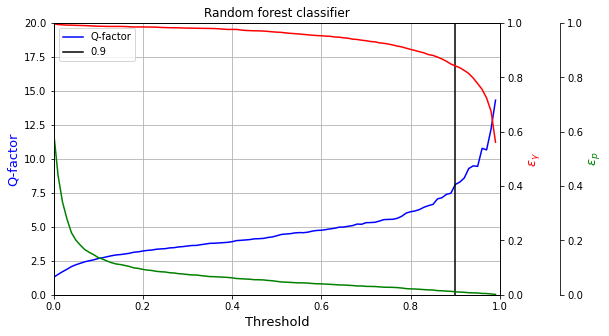

In [128]:
##Plotting Q-factor and efficiencies vs cut altogether in the same graph
from matplotlib import lines
fig, host = plt.subplots(figsize=(8,5))

par1 = host.twinx()
par2 = host.twinx()

host.set_xlim(0, 1)
host.set_ylim(0, 20)
par1.set_ylim(0, 1)
par2.set_ylim(0, 1)

host.set_xlabel("Threshold", fontsize=13)
host.set_ylabel("Q-factor", fontsize=13)
par1.set_ylabel('$\epsilon_{\gamma}$', fontsize=13)
par2.set_ylabel("$\epsilon_{p}$", fontsize=13)

p1, = host.plot(treshold, Q, color='blue', label="Q-factor")
p2, = par1.plot(treshold, ph_eff, color='red', label=r'$\epsilon_{\gamma}$')
p3, = par2.plot(treshold, pro_eff, color='green', label=r'$\epsilon_{p}$')

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best', bbox_to_anchor=(0.01, 0.5, 0.25, 0.5), fontsize=12)

plt.title('Random forest classifier')
# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))


#lgd = []
#lgd.append(lines.Line2D([0.9,0.9],[0,20], color = 'k', label = 't-val'))
#plt.legend(handles = lgd)
tval = 0.9
host.axvline(tval, color='k', label=f'{tval}')
host.legend(loc='best')
                                  
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
host.grid()

In [137]:
#calculating confusion matrics
#TP,FP,FN,TN
samples = [[], [], [], []]

treshold = np.arange(0, 1, 0.01)
for t in treshold:
    selection = proba[:,0] > t
    selection0 = y_test[selection] == 0  
    samples[0].append(selection0.sum()) # True Negitive(TN), proton
    
    samples[1].append((y_test[~selection] == 0).sum()) #False positive(FP)
    samples[2].append((y_test[~selection] == 1).sum()) # True positive(TP), gamma
    selection3 = y_test[selection] == 1 
    
    samples[3].append(selection3.sum()) #False negitive(FN)
    
samples = np.array(samples)
total=np.sum(samples[0]+samples[1]+samples[2]+samples[3])
total

723400

In [138]:
#Calculating total number of photons and protons in the test set
n_photo_test = (y_test == 1).sum()
n_proto_test = (y_test == 0).sum()
print(n_photo_test)
print(n_proto_test)

3980
3254


In [139]:
print(samples[0])
#n_photo_test
print(samples[3])
print(samples[1])
print(samples[2])

[3249 3244 3239 3238 3232 3231 3229 3224 3221 3219 3212 3210 3206 3204
 3197 3195 3192 3188 3185 3183 3180 3173 3168 3165 3164 3163 3159 3155
 3154 3153 3148 3148 3143 3140 3137 3136 3132 3129 3126 3123 3122 3119
 3114 3111 3111 3109 3105 3103 3100 3093 3086 3082 3076 3074 3073 3068
 3065 3062 3059 3051 3046 3043 3040 3037 3036 3030 3024 3017 3016 3011
 3005 3001 2993 2990 2981 2978 2973 2963 2958 2950 2938 2932 2915 2903
 2892 2885 2870 2850 2827 2808 2774 2746 2713 2660 2600 2510 2346 2143
 1824 1292]
[1746 1291 1098  972  887  806  739  695  655  628  601  560  527  499
  475  463  438  421  403  387  369  350  338  322  308  298  290  276
  271  259  252  241  237  223  217  208  205  195  192  187  184  179
  173  167  161  156  151  145  137  134  129  123  118  115  114  112
  109  103   94   94   94   90   85   81   80   79   78   77   75   75
   73   71   70   69   67   65   61   60   59   58   58   58   55   52
   50   50   50   50   48   47   44   41   38   36   34   31   31

In [141]:
##calculate Q-factor and efficiencies

#photon efficiencies:TP/Total_test_gamma
ph_eff = (samples[2])/n_photo_test 
print(ph_eff)
#proton efficiency:FP/Total_test_proton
pro_eff = (samples[1]/n_proto_test)
print(pro_eff)
#Q-factor
Q = ph_eff/np.sqrt(pro_eff)
print(Q)

[0.56130653 0.67562814 0.7241206  0.75577889 0.77713568 0.79748744
 0.81432161 0.82537688 0.83542714 0.84221106 0.84899497 0.85929648
 0.86758794 0.87462312 0.88065327 0.88366834 0.88994975 0.89422111
 0.89874372 0.90276382 0.90728643 0.9120603  0.91507538 0.91909548
 0.92261307 0.92512563 0.92713568 0.93065327 0.93190955 0.93492462
 0.93668342 0.93944724 0.94045226 0.94396985 0.94547739 0.94773869
 0.94849246 0.95100503 0.95175879 0.95301508 0.95376884 0.95502513
 0.95653266 0.9580402  0.95954774 0.96080402 0.9620603  0.96356784
 0.96557789 0.96633166 0.96758794 0.96909548 0.97035176 0.97110553
 0.97135678 0.9718593  0.97261307 0.9741206  0.97638191 0.97638191
 0.97638191 0.97738693 0.97864322 0.97964824 0.9798995  0.98015075
 0.98040201 0.98065327 0.98115578 0.98115578 0.98165829 0.9821608
 0.98241206 0.98266332 0.98316583 0.98366834 0.98467337 0.98492462
 0.98517588 0.98542714 0.98542714 0.98542714 0.9861809  0.98693467
 0.98743719 0.98743719 0.98743719 0.98743719 0.9879397  0.98819

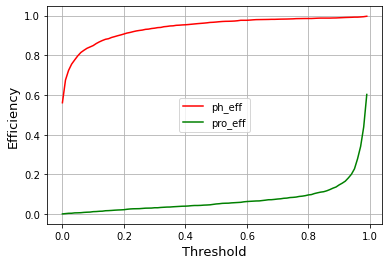

In [142]:
##photon efficiencies vs cut:
plt.plot(treshold, ph_eff, color='red', label="ph_eff")
##proton efficiency vs cut
plt.plot(treshold, pro_eff, color='green', label='pro_eff')
plt.legend(loc='best')
plt.xlabel("Threshold", fontsize=13)
plt.ylabel("Efficiency", fontsize=13)
plt.grid()

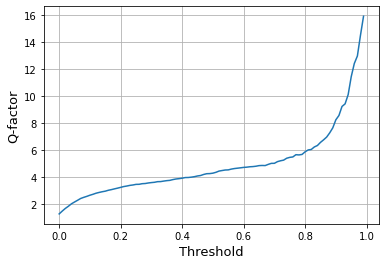

In [135]:
##Q-factor vs cut
plt.plot(treshold, Q)
plt.xlabel("Threshold", fontsize=13)
plt.ylabel("Q-factor", fontsize=13)
plt.grid()

In [519]:
#Calculation Q-factor and plotting
#plt.plot(treshold, ((samples[0]/n_photo_test)/np.sqrt(samples[3]/n_proto_test)))
#plt.plot(treshold, (samples[0]/n_proto_test))
#plt.plot(treshold, (samples[3]/n_proto_test))
#plt.ylabel('Q-factor')
#plt.xlabel('Threshold')
#plt.xlim(0,1)
#plt.grid()
#plt.savefig('Q-factor_shower_parameter.png')

In [520]:
##photon efficiency
ph_eff = (samples[0]/n_photo_test)
##hadron efficiency
pro_eff = (samples[3]/n_proto_test)
Q = (ph_eff/np.sqrt(pro_eff))
print(pro_eff)
print(ph_eff)
print(Q)

[0.5987005  0.43502475 0.34158416 0.28929455 0.24659653 0.21410891
 0.19368812 0.17759901 0.15965347 0.14913366 0.1404703  0.13149752
 0.12530941 0.11819307 0.11509901 0.11138614 0.10581683 0.10272277
 0.09993812 0.09684406 0.09344059 0.09034653 0.08756188 0.08508663
 0.0835396  0.08013614 0.0782797  0.07611386 0.07487624 0.07487624
 0.0730198  0.07054455 0.06961634 0.06837871 0.06683168 0.06466584
 0.06311881 0.06280941 0.06188119 0.06095297 0.05940594 0.05785891
 0.05662129 0.05538366 0.05476485 0.05352723 0.0522896  0.05136139
 0.05105198 0.04888614 0.04795792 0.04733911 0.04579208 0.04362624
 0.04331683 0.04238861 0.0414604  0.04022277 0.03929455 0.03898515
 0.03836634 0.0362005  0.03496287 0.03496287 0.03434406 0.03403465
 0.03279703 0.03217822 0.03125    0.03063119 0.02970297 0.02815594
 0.02691832 0.02568069 0.02506188 0.02475248 0.02382426 0.02227723
 0.0210396  0.01918317 0.01825495 0.01701733 0.01670792 0.01639851
 0.01608911 0.01485149 0.01454208 0.01299505 0.01144802 0.0111

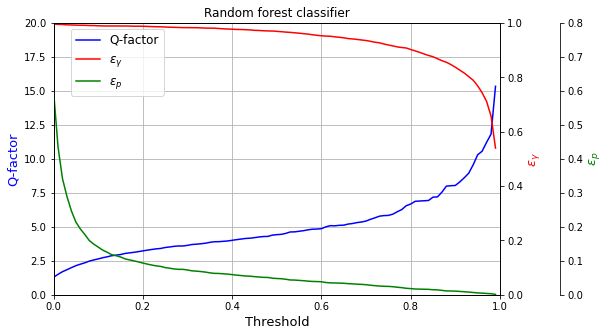

In [521]:
fig, host = plt.subplots(figsize=(8,5))

par1 = host.twinx()
par2 = host.twinx()

host.set_xlim(0, 1)
host.set_ylim(0, 20)
par1.set_ylim(0, 1)
par2.set_ylim(0, 0.8)

host.set_xlabel("Threshold", fontsize=13)
host.set_ylabel("Q-factor", fontsize=13)
par1.set_ylabel('$\epsilon_{\gamma}$', fontsize=13)
par2.set_ylabel("$\epsilon_{p}$", fontsize=13)

p1, = host.plot(treshold, Q, color='blue', label="Q-factor")
p2, = par1.plot(treshold, ph_eff, color='red', label=r'$\epsilon_{\gamma}$')
p3, = par2.plot(treshold, pro_eff, color='green', label=r'$\epsilon_{p}$')

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best', bbox_to_anchor=(0.01, 0.5, 0.25, 0.5), fontsize=12)

plt.title('Random forest classifier')
# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))
                                  
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
host.grid()

In [522]:
#calculating confusion matrics
#TP,TN,FP,FN
#samples = [[], [], [], []]

#treshold = np.arange(0, 1, 0.01)
#for t in treshold:
#    sel = proba[:,0] > t
#    sel0 = y_test[sel] == 0
#    samples[0].append(sel0.sum()) # True positive
    
#    samples[1].append((y_test[~sel] == 1).sum()) #False negitive
#    samples[2].append((y_test[~sel] == 0).sum()) #False positive
#    sel3 = y_test[sel] == 1 
    
#    samples[3].append(sel3.sum()) #True negitive
    
#samples = np.array(samples)
#print(len(samples[0]))
#print(len(samples[1]))
#print(len(samples[2]))
#print(len(samples[3]))

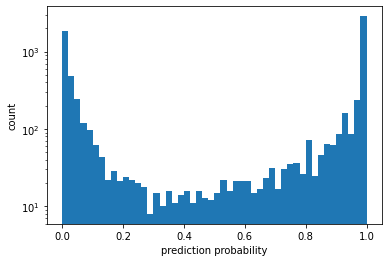

In [523]:
plt.hist(rf_probs, bins=50)
plt.yscale('log')
plt.ylabel('count')
plt.xlabel('prediction probability')
plt.show()

<ipython-input-17-7b92613c1b7d>:4: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


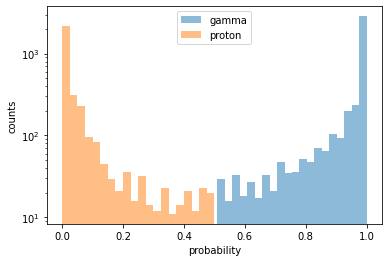

In [17]:
#Histogram showing the gamm and proton predictions from the network
plt.hist(rf_probs[y_pred==1], bins=20, alpha=0.5, label='gamma')
plt.hist(rf_probs[y_pred==0], bins=20, alpha=0.5, label='proton')
plt.yscale('log', nonposy='clip')
plt.xlabel('probability')
plt.ylabel('counts')
plt.legend(loc='best')
plt.show()
#print(len(y_score[test_y==0]))
#print(len(y_score[test_y==1]))

In [21]:
clf.score(X_test, y_test)

0.9618468343931434